In [ ]:

import os   ##  this one works to check your directory and show all data sets within that folder

with os.scandir('Datasets_Folder/') as entries:
    for entry in entries:
        print(entry.name  )
        
#    to undo , Enter then cntrl Z   <<---------------------- to UNDO        

#  And  ...

##   use   '  cntrl /  '  to comment out mass blocks of code , highlight all code then ,    '  cntrl /  '


In [2]:


##------------------
##
##      START
##
##------------------

# this seems to work   <<-------------

import numpy as np     
import pandas as pd 
import matplotlib.pyplot as plt

## 1st upload data into Juypter Notebook, 2nd copy this 'global_warming.csv' into pd read as below

#Datasets_Folder()

#data = pd.read_csv("global_warming.csv")
data = pd.read_csv("Datasets_Folder/iris.csv")
print (data.head(5)) 

##------------------
##
##      END
##
##------------------




   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [ ]:
data.describe()

In [ ]:

# Checks all columns , sums each column for isnull, NaN  <<------
data.isnull().sum(axis=0)


In [ ]:

# shows all relevant data
data.info()


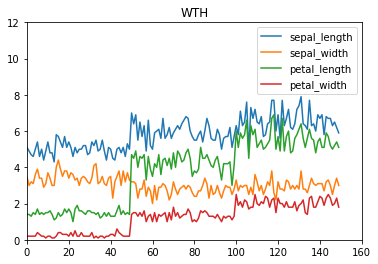

In [19]:

#  Scatter ?? might work better if you select particular column
#  gives a line plot

data.plot(xlim=[0,160], ylim=[0,12], title='WTH')



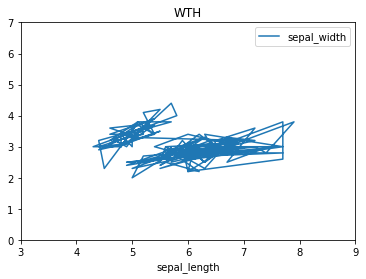

In [14]:

# data.plot(self, x, y, kind, ax, subplots, sharex, sharey, layout, 
#           figsize, use_index, title, grid, legend, style, logx, 
#           logy, loglog, xticks, yticks, xlim, ylim, rot, fontsize, 
#           colormap, table, yerr, xerr, secondary_y, sort_columns, **kwds)

data.plot.line( 'sepal_length', 'sepal_width', xlim=[3,9], ylim=[0,7], title='WTH')


In [ ]:
data.plot.density()

In [ ]:
data.plot.hist()

In [ ]:

# produces a horizointal set of lines
data.plot.barh(stacked=True,alpha=0.5)

In [ ]:
data.plot.bar()

In [ ]:

# 
# things to do, 
# plot particular column, 
# run NaN, null, '0' test,  maybe make a function ?
# command for new line  .\n  ?
#




In [ ]:

# To know the data types
data.dtypes.value_counts()


In [ ]:

# To know the data types
# This one is better

def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns
    
    
# Now enter Value to find NaN values 
missing_values_table(data)

In [ ]:

# To know the data types
# This one is more thorough but top is better as it is less overall stuff

def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#       mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

# Now enter Value to find NaN values 
missing_zero_values_table(data)
